In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
a=tf.ones((2,2))
print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [5]:
b=tf.square(a)
print(b)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [6]:
c=tf.sqrt(a)
print(c)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [8]:
#두 텐서를 더하기 (원소별 연산)
d=b+c
print(d)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [10]:
#두 텐서의 점곱
e=tf.matmul(a,b)
print(e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [11]:
# 두 텐서를 곱하기
f = e*d
print(f)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [13]:
v = tf.Variable( initial_value = tf.random.normal( shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.8025538 ],
       [-0.6979406 ],
       [-0.56282645]], dtype=float32)>


In [15]:
v.assign(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [20]:
v[0,0].assign(3)

print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [22]:
v.assign_add(tf.ones( (3,1) ))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [24]:
# 변수는, 훈련가능한 변수는 기본적으로 감시 대상이다. 
input_var = tf.Variable( initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square( input_var )

gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [25]:
# 상수는 호출을 추적한다

input_cons = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch( input_cons)
    result = tf.square( input_cons )

gradient = tape.gradient(result, input_cons)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [28]:
# 이계도 (second-order)  그레디언트
time = tf.Variable(1.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time **2
    speed = inner_tape.gradient(position, time)

acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


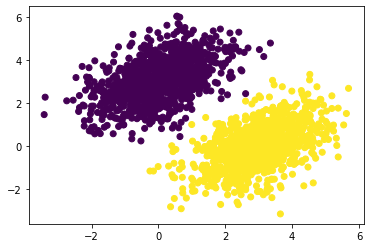

In [8]:
import numpy as np

num_samples_per_class = 1000

neg_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)

pos_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)

inputs = np.vstack((neg_samples, pos_samples)).astype(np.float32) 

targets = np.vstack( (np.zeros((num_samples_per_class, 1), dtype = "float32"),
                      np.ones((num_samples_per_class, 1), dtype = "float32" )))

import matplotlib.pyplot as plt
                      
plt.scatter( inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [9]:
# 선형 분류기 
# 아핀변환 ( pred = W(dot)input + b)

input_dim = 2
output_dim = 1 
W = tf.Variable(initial_value = tf.random.uniform( shape=(input_dim, output_dim) ))
b = tf.Variable(initial_value = tf.zeros( shape=(output_dim,) ))

#정방향패스
def model(inputs):
    return tf.matmul(inputs, W)+b

#손실함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square( targets - predictions )
    return tf.reduce_mean(per_sample_losses) # 하나의 스칼라 손실값으로 평균

learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape: 
        prediction = model(inputs)
        loss = square_loss(targets, prediction)
    
    # 그레디언트 계산
    grad_loss_W, grad_loss_b = tape.gradient(loss, [W,b])
    
    # 가중치 업데이트
    W.assign_sub( grad_loss_W * learning_rate)
    b.assign_sub( grad_loss_b * learning_rate)
    
    return loss


In [10]:
#배치 훈련 루프
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}" )

0번째 스텝의 손실: 1.6569
1번째 스텝의 손실: 0.2284
2번째 스텝의 손실: 0.1184
3번째 스텝의 손실: 0.0984
4번째 스텝의 손실: 0.0906
5번째 스텝의 손실: 0.0848
6번째 스텝의 손실: 0.0796
7번째 스텝의 손실: 0.0749
8번째 스텝의 손실: 0.0707
9번째 스텝의 손실: 0.0668
10번째 스텝의 손실: 0.0632
11번째 스텝의 손실: 0.0599
12번째 스텝의 손실: 0.0570
13번째 스텝의 손실: 0.0542
14번째 스텝의 손실: 0.0518
15번째 스텝의 손실: 0.0495
16번째 스텝의 손실: 0.0474
17번째 스텝의 손실: 0.0455
18번째 스텝의 손실: 0.0438
19번째 스텝의 손실: 0.0422
20번째 스텝의 손실: 0.0407
21번째 스텝의 손실: 0.0394
22번째 스텝의 손실: 0.0382
23번째 스텝의 손실: 0.0371
24번째 스텝의 손실: 0.0361
25번째 스텝의 손실: 0.0352
26번째 스텝의 손실: 0.0343
27번째 스텝의 손실: 0.0335
28번째 스텝의 손실: 0.0328
29번째 스텝의 손실: 0.0322
30번째 스텝의 손실: 0.0316
31번째 스텝의 손실: 0.0311
32번째 스텝의 손실: 0.0306
33번째 스텝의 손실: 0.0301
34번째 스텝의 손실: 0.0297
35번째 스텝의 손실: 0.0293
36번째 스텝의 손실: 0.0290
37번째 스텝의 손실: 0.0287
38번째 스텝의 손실: 0.0284
39번째 스텝의 손실: 0.0281


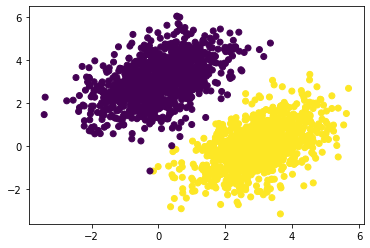

In [11]:
# 훈련 데이타의 분류 
# 포인트 [x,y]에 대한 예측값은 w1*x = w2*y + b
# 클래스 0은 w1*x = w2*y + b > 0.5 
# 클래스 1은 w1*x = w2*y + b < 0.5 
predictions = model(inputs)
plt.scatter( inputs[:,0], inputs[:,1], c=predictions[:,0] >0.5) # 0.5보다 크면 1
plt.show()

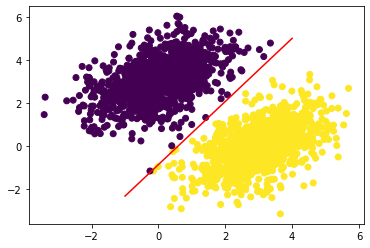

In [12]:
# 포인트 [x,y]에 대한 예측값은 w1*x = w2*y + b
# y =  - w1/w2 * x + (0.5 - b)/w2

x = np.linspace( -1, 4, 100) # -1 ~ 4 사이에 100개의 숫자 생성
y = -W[0]/W[1]* x + (0.5 - b) / W[1]
plt.plot(x,y, "-r") # 빨간색 직선
plt.scatter( inputs[:,0], inputs[:,1], c=predictions[:,0] >0.5)
plt.show()